### Importing Libraries and Setting Up Environment  

In this step, we import all the necessary libraries for the project:  

- **os** → File system operations (like saving/loading models).  
- **numpy, pandas** → Numerical computations and data manipulation.  
- **matplotlib, seaborn** → Data visualization (plots, graphs, trends).  
- **scikit-learn modules**:  
  - `train_test_split`, `cross_val_score`, `RandomizedSearchCV` → Model training, validation, and hyperparameter tuning.  
  - `Pipeline`, `ColumnTransformer` → Building a clean ML pipeline.  
  - `SimpleImputer` → Handling missing values.  
  - `StandardScaler`, `OneHotEncoder` → Feature scaling and categorical encoding.  
  - `LogisticRegression`, `RandomForestClassifier` → Machine learning models.  
  - `classification_report`, `confusion_matrix`, `roc_auc_score`, `roc_curve`, `accuracy_score` → Model evaluation metrics.  
- **joblib** → Saving and loading trained models.  
- **warnings** → To ignore warning messages for cleaner output.  
- **sns.set_style("whitegrid")** → Sets a clean and readable style for plots.  
- **RANDOM_STATE = 42** → Ensures reproducibility of results (same splits and randomness every time).  

This setup prepares us for the full **data science pipeline**: from preprocessing to modeling, evaluation, and deployment.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
RANDOM_STATE = 42

### Loading the Dataset  

Here, we load the telecom customer churn dataset into a pandas DataFrame:  

- **DATA_PATH** → Points to the location of the CSV file (`Telco_customer_churn_dataset.csv`).  
- **pd.read_csv(DATA_PATH)** → Reads the dataset into a DataFrame named `df`.  
- **df.shape** → Prints the dimensions of the dataset (rows × columns), giving an idea of how much data we are working with.  
- **df.head(7)** → Displays the first 7 rows of the dataset for a quick preview of columns, values, and structure.  

This step helps us verify that the dataset is correctly loaded and gives a first look at the data we’ll preprocess and analyze.

In [2]:
DATA_PATH = "../data/Telco_customer_churn_dataset.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head(7)

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


### Exploring Dataset Information and Missing Values  

In this step, we investigate the structure and quality of the   

- **df.info()** → Provides an overview of the dataset, including column names, data types, and non-null counts. This helps identify categorical vs. numerical columns.  
- **df.isnull().sum()** → Displays the number of missing values for each column, allowing us to detect data quality issues early.  
- **Unique value counts for selected columns** → For important categorical columns like *gender, SeniorCitizen, Partner, Dependents, PhoneService, InternetService, Contract, PaymentMethod,* and *Churn*, we check how many distinct values they contain.  

This exploration step helps in:  
1. Identifying missing data that may need imputation.  
2. Understanding the categorical variables for encoding in preprocessing.  
3. Spotting potential data irregularities before modeling.  

Essentially, it sets the foundation for **data cleaning and feature engineering** in later steps.

In [3]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSample unique counts:")
for col in ['gender','SeniorCitizen','Partner','Dependents','PhoneService','InternetService','Contract','PaymentMethod','Churn']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Handling Data Type Conversion and Missing Values  

In this step, we focus on cleaning the **TotalCharges** column:  

- **pd.to_numeric(..., errors='coerce')** → Converts the `TotalCharges` column to numeric values. If some entries are invalid (e.g., spaces or non-numeric strings), they are converted to `NaN`.  
- **isna().sum()** → Counts how many values turned into `NaN` after conversion, helping us confirm data inconsistencies.  
- **fillna(df['TotalCharges'].median())** → Replaces all missing values in `TotalCharges` with the median of the column. Median imputation is chosen because it is less sensitive to extreme values compared to mean, ensuring stability.  

By the end of this step, the `TotalCharges` column is clean, numeric, and free of missing values—making it ready for feature scaling and model training.

In [4]:
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # count coerced
    print("TotalCharges nulls after conversion:", df['TotalCharges'].isna().sum())
    # filling with median
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

TotalCharges nulls after conversion: 11


### Cleaning Column Names and Dropping Irrelevant Features  

Here, we refine the dataset by cleaning column names and removing unnecessary identifiers:  

- **df.columns.str.strip()** → Removes any leading or trailing spaces from column names to prevent errors during preprocessing.  
- **drop(columns=['customerID'])** → The `customerID` column is dropped since it serves only as a unique identifier and does not contribute to predicting churn.  
- **df.columns.tolist()** → Prints the updated list of columns to confirm that the dataset now only contains relevant features.  

This step ensures that the dataset has clean labels and contains only meaningful features for churn prediction, avoiding unnecessary noise in modeling.

In [5]:
df.columns = df.columns.str.strip()
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
print("Columns:", df.columns.tolist())

Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### Encoding the Target Variable (Churn)  

In this step, we convert the target column `Churn` into a numerical format suitable for machine learning models:  

- **df['Churn'].map({'Yes':1, 'No':0})** → Maps churn decisions into binary values:  
  - **1** → Customer has churned.  
  - **0** → Customer did not churn.  
- **value_counts(normalize=True)** → Displays the proportion of churned vs. non-churned customers, giving an idea of class distribution (whether the dataset is balanced or imbalanced).  

By encoding the target variable, we make it compatible with classification algorithms and also gain insight into churn prevalence in the dataset.

In [6]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
print("Churn distribution:\n", df['Churn'].value_counts(normalize=True))

Churn distribution:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


### Visualizing Target Distribution and Key Features  

This step involves exploratory visualizations to understand the distribution of churn and its relationship with important numeric features:  

- **Churn Countplot** → Shows the count of customers who churned (1) vs. those who stayed (0). It helps visualize class imbalance directly.  
- **MonthlyCharges Histogram by Churn** → Displays the distribution of monthly charges for churned vs. non-churned customers. Differences here can reveal whether pricing impacts churn behavior.  
- **Tenure Boxplot by Churn** → Compares the tenure (length of customer relationship) between churned and non-churned groups using boxplots. It highlights if longer-tenured customers are less likely to churn.  

These plots provide insights on how some key features relate to churn, guiding feature engineering and model design.

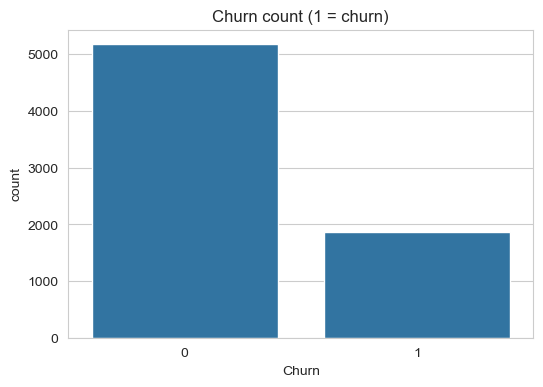

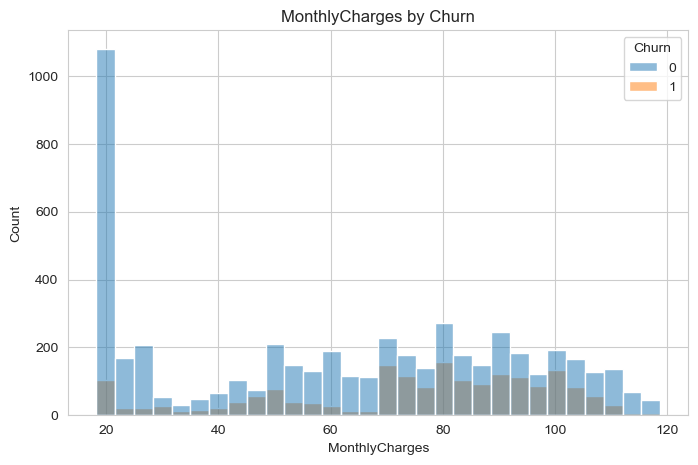

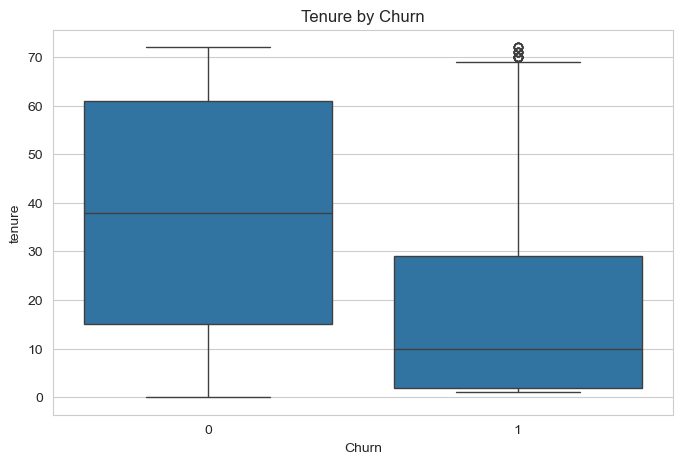

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn count (1 = churn)')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=False, stat='count')
plt.title('MonthlyCharges by Churn')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()

### Analyzing Churn Rate by Contract Type  

In this step, we analyze how the type of contract influences churn behavior:  

- **Group by `Contract` and calculate mean churn** → Aggregates customers by their contract type (e.g., month-to-month, one year, two year) and computes the average churn rate within each group.  
- **Sort values descending** → Orders contract types from highest to lowest churn rate, helping identify which contract types are most associated with churn.  

This analysis helps uncover patterns or risk factors related to contract duration impacting customer loyalty.

In [8]:
if 'Contract' in df.columns:
    churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
    print("Churn rate by Contract:\n", churn_by_contract)

Churn rate by Contract:
 Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


### Defining Numeric Features  

Here, we explicitly select the numeric features from the dataset that will be used for modeling:  

- **`tenure`** → Customer’s duration (in months) with the company.  
- **`MonthlyCharges`** → The monthly fee charged to the customer.  
- **`TotalCharges`** → The total amount charged to the customer over their tenure.  
- **`SeniorCitizen`** → A binary indicator (0 or 1) specifying if the customer is a senior citizen.  

Identifying numeric columns is crucial for applying appropriate preprocessing steps like scaling and imputation.

In [9]:
# Numeric features
numeric_features = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']

### Identifying Categorical Features  

In this step, we separate numeric and categorical features for targeted preprocessing:  

- **all_features** → List of all dataset columns excluding the target `Churn`.  
- **Removing numeric features** → Numeric features defined previously are removed from `all_features` to isolate categorical features.  
- **categorical_features** → Remaining columns interpreted as categorical features, excluding the target.  
- **Print statements** → Display the lists of numeric and categorical feature names for confirmation.  

This clear separation enables tailored preprocessing pipelines for numeric and categorical variables later in the workflow.

In [10]:
all_features = df.columns.tolist()
all_features.remove('Churn')
for nf in numeric_features:
    if nf in all_features:
        all_features.remove(nf)
categorical_features = [c for c in all_features if c != 'Churn']

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Splitting Data into Training and Testing Sets  

In this step, we prepare the dataset for modeling by splitting features and target, then creating train-test splits:  

- **X = df.drop(columns=['Churn'])** → Defines the feature matrix excluding the target column.  
- **y = df['Churn']** → Defines the target vector (churn labels).  
- **train_test_split(...)** → Splits the dataset into training and testing sets:  
  - **test_size=0.2** → Reserves 20% of data as test set for performance evaluation.  
  - **random_state=RANDOM_STATE** → Ensures reproducibility by fixing randomness.  
  - **stratify=y** → Maintains the original class distribution in both train and test sets, which is important for imbalanced classification problems.  
- **Print statement** → Confirms the dimensions of training and testing datasets.  

This step is critical for unbiased model evaluation on unseen data.

In [11]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Train/Test sizes:", X_train.shape, X_test.shape)

Train/Test sizes: (5634, 19) (1409, 19)


### Building Preprocessing Pipelines  

This step defines the preprocessing transformations for numeric and categorical features before modeling:  

- **Numeric Transformer Pipeline**:  
  - `SimpleImputer(strategy='median')` → Fills missing numeric values with the median to reduce bias from outliers.  
  - `StandardScaler()` → Scales numeric features to have zero mean and unit variance, improving algorithm performance.  

- **Categorical Transformer Pipeline**:  
  - `SimpleImputer(strategy='most_frequent')` → Fills missing categorical values with the most common category in each feature.  
  - `OneHotEncoder(handle_unknown='ignore', sparse_output=False)` → Converts categorical variables into a one-hot encoded numeric array, ignoring unseen categories in new data.  

- **ColumnTransformer**:  
  - Combines numeric and categorical pipelines to apply the appropriate transformations to respective feature sets simultaneously.  

This modular preprocessing setup ensures clean, well-structured input data for machine learning models.

In [13]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### Training and Evaluating Logistic Regression Model  

In this step, we build a complete pipeline by combining preprocessing with a Logistic Regression classifier:  

- **Pipeline construction**:  
  - Combines the previously defined `preprocessor` with a `LogisticRegression` model.  
  - `class_weight='balanced'` addresses class imbalance by adjusting weights inversely proportional to class frequencies.  
  - `max_iter=1000` allows more iterations for convergence.  
  - `random_state` ensures reproducibility.  

- **Model training**:  
  - `fit(X_train, y_train)` trains the logistic regression on the training data with all preprocessing applied within the pipeline.  

- **Predictions and evaluation**:  
  - `predict(X_test)` generates binary churn predictions on the test data.  
  - `predict_proba(X_test)[:,1]` provides predicted probabilities of churn for ROC AUC calculation.  
  - Prints the classification report including precision, recall, f1-score, and support for each class.  
  - Prints ROC AUC score to measure model’s ability to distinguish between churners and non-churners.  

This step gives a baseline performance evaluation of logistic regression on the churn prediction task.

In [14]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE))
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:,1]

print("Logistic Regression results:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

Logistic Regression results:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC AUC: 0.8412978893797307


### Random Forest Model with Hyperparameter Tuning  

This step enhances the churn prediction model using a Random Forest classifier with hyperparameter optimization:  

- **Pipeline setup**:  
  - Combines the preprocessing step with a `RandomForestClassifier` using balanced class weights to handle class imbalance.  
  - `n_jobs=-1` enables parallel processing to speed up training.  

- **Hyperparameter search space (`param_dist`)**:  
  - `n_estimators`: Number of decision trees in the forest (100, 200, 300).  
  - `max_depth`: Maximum tree depth (None means unlimited, or specified depths like 8, 16, 24).  
  - `min_samples_split`: Minimum samples required to split a node (2, 5, 10).  
  - `min_samples_leaf`: Minimum samples required in a leaf node (1, 2, 4).  

- **RandomizedSearchCV setup**:  
  - Performs a randomized search with 20 iterations over the hyperparameter grid.  
  - Uses 3-fold cross-validation and optimizes for ROC AUC score.  
  - Enables parallel processing for efficiency and verbose logging for progress tracking.  

- **Fitting and results**:  
  - Fits the randomized search to the training data.  
  - Prints the best hyperparameters found and the corresponding cross-validation ROC AUC score.  
  - Stores the best model pipeline for further evaluation.  

This method finds a better-performing Random Forest model by automatically tuning hyperparameters to maximize churn prediction accuracy.

In [15]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1))
])

param_dist = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 8, 16, 24],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

rs = RandomizedSearchCV(
    rf_pipeline,
    param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Best CV ROC AUC:", rs.best_score_)
best_model = rs.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 8}
Best CV ROC AUC: 0.8473220926253028


### Evaluating the Best Random Forest Model  

In this final evaluation step, we assess the performance of the best Random Forest model found during hyperparameter tuning:  

- **Predictions**:  
  - `predict(X_test)` generates the churn class predictions on the test set.  
  - `predict_proba(X_test)[:,1]` gives the predicted probability of churn for ROC AUC calculation.  

- **Performance metrics**:  
  - `classification_report` details precision, recall, f1-score, and support for each class, providing a comprehensive view of classification quality.  
  - `accuracy_score` reports the overall accuracy of the model on test data.  
  - `roc_auc_score` measures the model’s ability to discriminate between churn and non-churn cases, crucial for imbalanced data.  

This step validates the model’s effectiveness in predicting customer churn, summarizing its predictive strengths and areas for potential improvement.

In [16]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("RandomForest - classification report")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

RandomForest - classification report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

Accuracy: 0.759403832505323
ROC AUC: 0.8408367563099021


### Visualizing Model Performance with Confusion Matrix  

In this step, we create a confusion matrix to visualize prediction results of the Random Forest model on the test set:  

- **confusion_matrix(y_test, y_pred)** → Computes a matrix showing counts of:  
  - True Negatives (correctly predicted no churn)  
  - False Positives (incorrectly predicted churn)  
  - False Negatives (missed churn cases)  
  - True Positives (correctly predicted churn)  

- **sns.heatmap(...)** → Displays the confusion matrix as a heatmap with annotations for easy interpretation.  
- Axis labels (`Predicted`, `Actual`) and tick labels (`No`, `Yes`) clearly show classification results for each churn class.  
- The plot title “Confusion Matrix” summarizes the visualization purpose.  

The confusion matrix visually summarizes model prediction errors and successes, guiding further improvements or business decisions.

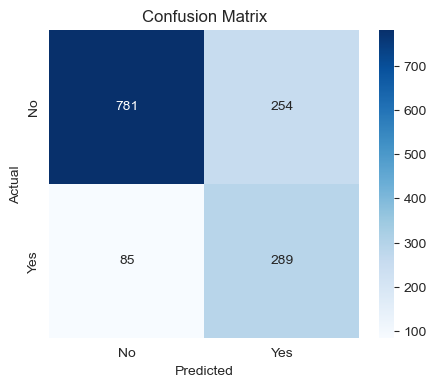

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve Visualization  

This step visualizes the ROC (Receiver Operating Characteristic) curve to evaluate the model's discrimination ability:  

- **roc_curve(y_test, y_proba)** → Computes the false positive rate (FPR) and true positive rate (TPR) at various probability thresholds.  
- **Plotting**:  
  - The ROC curve plots TPR vs. FPR, showing the tradeoff between sensitivity and specificity across thresholds.  
  - The diagonal line (`k--`) represents a random classifier baseline for comparison.  
  - The legend includes the computed Area Under the Curve (AUC), summarizing overall model performance in a single metric.  
- **Labels and title** clarify the axes and plot purpose.  

The ROC curve and AUC provide a comprehensive picture of model performance in distinguishing churners from non-churners, critical for imbalanced classification tasks.

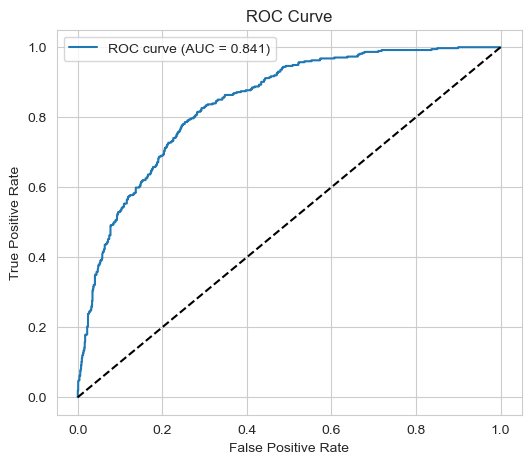

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Feature Importance Analysis  

In this step, we analyze which features contribute most to the Random Forest model’s churn predictions:  

- **Extracting feature names**:  
  - Retrieves one-hot encoded feature names from the preprocessing pipeline for categorical variables.  
  - Combines these with the numeric feature names to create a complete list of input features after preprocessing.  

- **Extracting feature importances**:  
  - Accesses the `feature_importances_` attribute of the trained Random Forest classifier to get importance scores for each feature.  

- **Creating a sorted series (`feat_imp`)**:  
  - Maps importance scores to feature names and sorts them in descending order.  
  - Prints the top 20 most important features that influence the model’s predictions.  

This insight helps interpret the model and identify key drivers of customer churn.

In [19]:
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + ohe_feature_names

importances = best_model.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(20))

tenure                                 0.129272
Contract_Month-to-month                0.128176
TotalCharges                           0.084496
Contract_Two year                      0.074441
OnlineSecurity_No                      0.073031
MonthlyCharges                         0.060156
InternetService_Fiber optic            0.056658
TechSupport_No                         0.052363
PaymentMethod_Electronic check         0.046267
Contract_One year                      0.021502
OnlineSecurity_Yes                     0.015360
InternetService_DSL                    0.015207
TechSupport_Yes                        0.014947
OnlineBackup_No                        0.014898
OnlineSecurity_No internet service     0.014287
PaperlessBilling_No                    0.011126
StreamingMovies_No internet service    0.010235
TechSupport_No internet service        0.009386
OnlineBackup_Yes                       0.009373
PaperlessBilling_Yes                   0.009253
dtype: float64


### Visualizing Top Feature Importances  

This step visualizes the most influential features identified by the Random Forest model:  

- **Barh plot**:  
  - Displays the top 12 features with the highest importance scores in a horizontal bar chart, sorted in ascending order for readability.  
- **Figure size and title**:  
  - The plot is sized for clarity and titled "Top 12 Feature Importances" to convey its purpose.  

This visualization highlights key factors driving the model’s churn predictions, aiding interpretability and business insights.

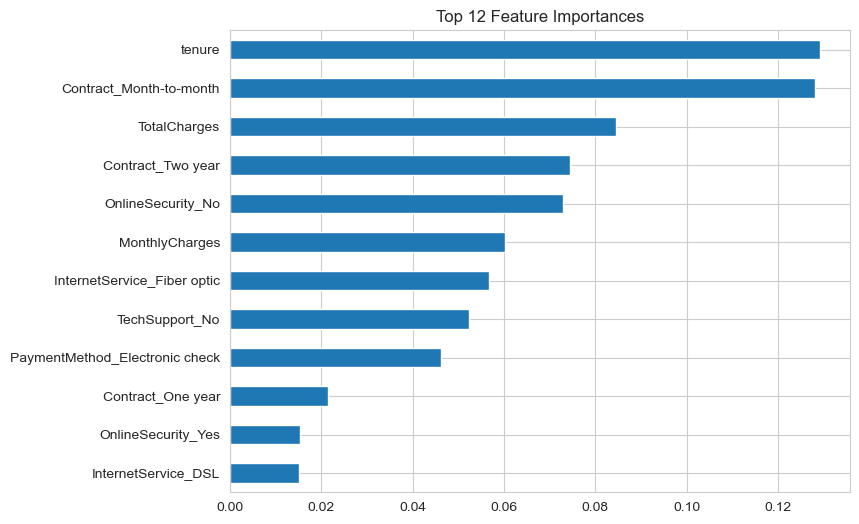

In [20]:
plt.figure(figsize=(8,6))
feat_imp.head(12).sort_values().plot(kind='barh')
plt.title('Top 12 Feature Importances')
plt.show()

### Handling Class Imbalance with SMOTE and Improved Pipeline  

Here, we address the class imbalance issue by integrating SMOTE (Synthetic Minority Over-sampling Technique) into the pipeline:  

- **Installing imbalanced-learn** → Installs the `imblearn` library, which includes tools for dealing with imbalanced datasets.  
- **Using `ImbPipeline`** → A pipeline variant compatible with SMOTE and other resampling techniques.  
- **SMOTE step** → Synthesizes new minority class samples (churn cases) to balance the training data distribution.  
- **Pipeline structure**:  
  - Preprocessing (`preprocessor`) is applied first.  
  - SMOTE then generates synthetic samples only on the training data to avoid leakage.  
  - Finally, a `RandomForestClassifier` is trained on the balanced data.  

This approach aims to improve model performance by providing a more balanced representation of churners and non-churners during training.

In [22]:
!pip install imbalanced-learn

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


### Training and Evaluating SMOTE-Enhanced Random Forest Model  

In this step, the SMOTE-augmented pipeline is trained and evaluated:  

- **Fitting**:  
  - The pipeline applies preprocessing, generates synthetic minority samples via SMOTE on training data, and fits a Random Forest classifier.  

- **Prediction and evaluation**:  
  - Predicts churn classes on the test set without synthetic data to simulate real-world performance.  
  - Prints a classification report showing precision, recall, f1-score, and support for churn prediction.  

This demonstrates the impact of using SMOTE to handle class imbalance and its effect on model predictive capability.

In [23]:
smote_pipeline.fit(X_train, y_train)
y_pred_sm = smote_pipeline.predict(X_test)
print("SMOTE + RF classification report:")
print(classification_report(y_test, y_pred_sm))

SMOTE + RF classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1035
           1       0.58      0.56      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.77      0.77      1409



### Saving the Trained Model Pipeline  

In the final step, we save the best-trained model pipeline for future use:  

- **Creating directory**:  
  - Uses `os.makedirs()` with `exist_ok=True` to create a model directory if it doesn't already exist.  

- **Saving with joblib**:  
  - Dumps the `best_model` pipeline (including preprocessing and classifier) to a file named `churn_pipeline.joblib`.  
  - This saved pipeline can later be loaded to make predictions on new data without retraining.  

- **Confirmation print**:  
  - Confirms the successful saving of the model pipeline and the path where it is stored.  

This step enables model deployment and reusability, completing the churn prediction project workflow.

In [24]:
import joblib
os.makedirs("../model", exist_ok=True)
MODEL_PATH = "../model/churn_pipeline.joblib"
joblib.dump(best_model, MODEL_PATH)
print("Saved pipeline to:", MODEL_PATH)

Saved pipeline to: ../model/churn_pipeline.joblib


### Single Sample Prediction Function  

This step defines a reusable function for predicting churn on a single new customer sample:  

- **`predict_single(sample_dict, model=best_model)`**:  
  - Takes a dictionary with feature names and values matching the model’s expected input.  
  - Converts the dictionary to a DataFrame suitable for the pipeline.  
  - Uses the trained pipeline to predict both the churn class (`0` or `1`) and the probability of churn.  
  - Returns a dictionary containing the predicted class and probability for interpretability.  

- **Example sample**:  
  - Provides a customer profile dictionary with relevant features such as demographics, service subscriptions, and charges.  
  - Demonstrates function usage by printing the churn prediction and confidence score for this example customer.  

This function enables practical application of the model for real-time or batch customer churn prediction.

In [25]:
def predict_single(sample_dict, model=best_model):
    # sample_dict: keys must match feature names used in training (columns of X)
    sample_df = pd.DataFrame([sample_dict])
    proba = model.predict_proba(sample_df)[0,1]
    pred = model.predict(sample_df)[0]
    return {'prediction': int(pred), 'probability': float(proba)}
    
sample = {
    'gender':'Female', 'SeniorCitizen':0, 'Partner':'Yes', 'Dependents':'No',
    'tenure':5, 'PhoneService':'Yes', 'MultipleLines':'No', 'InternetService':'DSL',
    'OnlineSecurity':'No', 'OnlineBackup':'Yes', 'DeviceProtection':'No', 'TechSupport':'No',
    'StreamingTV':'No', 'StreamingMovies':'No', 'Contract':'Month-to-month', 'PaperlessBilling':'Yes',
    'PaymentMethod':'Electronic check', 'MonthlyCharges':70.7, 'TotalCharges':151.65
}

print(predict_single(sample))

{'prediction': 1, 'probability': 0.5995898311289333}


### Saving Feature Schema for Model Input Validation  

In this step, we save the list of feature names used in the model as a JSON schema file:  

- **Creating schema dictionary**:  
  - Stores the feature names (columns of `X`) under the key `'features'`.  

- **Writing to JSON file**:  
  - Saves the schema to `feature_schema.json` inside the model directory.  
  - The file contains a formatted list of expected feature inputs for the model.  

- **Confirmation print**:  
  - Confirms the schema file’s location, facilitating model input validation and integration in deployment environments.  

This schema ensures that new input data matches the features expected by the trained model, preventing input mismatch errors.

In [26]:
import json
schema = {'features': X.columns.tolist()}
with open('../model/feature_schema.json', 'w') as f:
    json.dump(schema, f, indent=2)
print("Feature schema saved at ../model/feature_schema.json")

Feature schema saved at ../model/feature_schema.json
